imports and constants

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch
import math

from myhelpers import config_plots
config_plots.global_settings()

species_csv_fileName = "TableS2HoyalCuthilletal2019ScienceAdvances.csv"
species_csv_fileName_cleaned = "TableS2HoyalCuthilletal2019ScienceAdvances_cleaned.csv"

image_subpath = "images"
species_csv_fileName_header = "Image filename"
species_csv_scientificName_header = "Species"
species_csv_fullsubspecies_header= "Fullsubspecies"
species_csv_view_header = "View"
species_csv_subspecies_header = "Subspecies"
species_csv_sex_header = "Sex"

species_csv_usedColumns = [species_csv_fileName_header,
                          species_csv_scientificName_header,
                          species_csv_view_header,
                          species_csv_subspecies_header,
                          species_csv_sex_header]

parameters

In [2]:
dataPath="/raid/elhamod/Butterflies2/Datasets/LowResolution"

# image_paths=["originals/FMNH", "originals/OSUM", "originals/INHS", "originals/JFBM", "originals/UWZM"]
# csv_path="originals" # Usually same as image_path  unless images are stored in a different root dir
# suffix="" # "curated_30_50"#"biology_paper_cleaned_30max"

# image_paths=["cropped2/FMNH", "cropped2/OSUM", "cropped2/INHS", "cropped2/JFBM", "cropped2/UWZM"]
# csv_path="Curated5" # Usually same as image_path  unless images are stored in a different root dir
suffix="full"#"biology_paper_cleaned_30max"

# numOfRows=None # Keep None if you want all species
# images_per_row = 7

cuda=1

Cuda

In [3]:
# set cuda
if torch.cuda.is_available():
    torch.cuda.set_device(cuda)
    print("using cuda", cuda)

using cuda 1


Plot information about the dataset

In [4]:
dir_path = os.path.join(dataPath, suffix)
file_path = os.path.join(dir_path, species_csv_fileName)
if not os.path.exists(file_path):
    print(file_path, "File not found")
    raise

# Read data frame
df = pd.read_csv(file_path, delimiter=',', index_col=species_csv_fileName_header, usecols=species_csv_usedColumns)
df[species_csv_fullsubspecies_header] = df[species_csv_scientificName_header] + " " + df[species_csv_subspecies_header]

def getStats(header_name, df, output_file_name):
    sub_df = df[header_name].reset_index().groupby(header_name).agg('count')
    count_table = sub_df.sort_values(by=[header_name]).rename(columns={species_csv_fileName_header: "count"}).reset_index().sort_values(by=['count'])
    color_list = []
    count_table.plot.bar(x=header_name, y='count', rot=90, figsize=(25, 20))
    plt.savefig(os.path.join(dir_path,output_file_name+'.pdf'))
    count_table.to_csv(os.path.join(dir_path, output_file_name+'.csv'))
    count_table

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


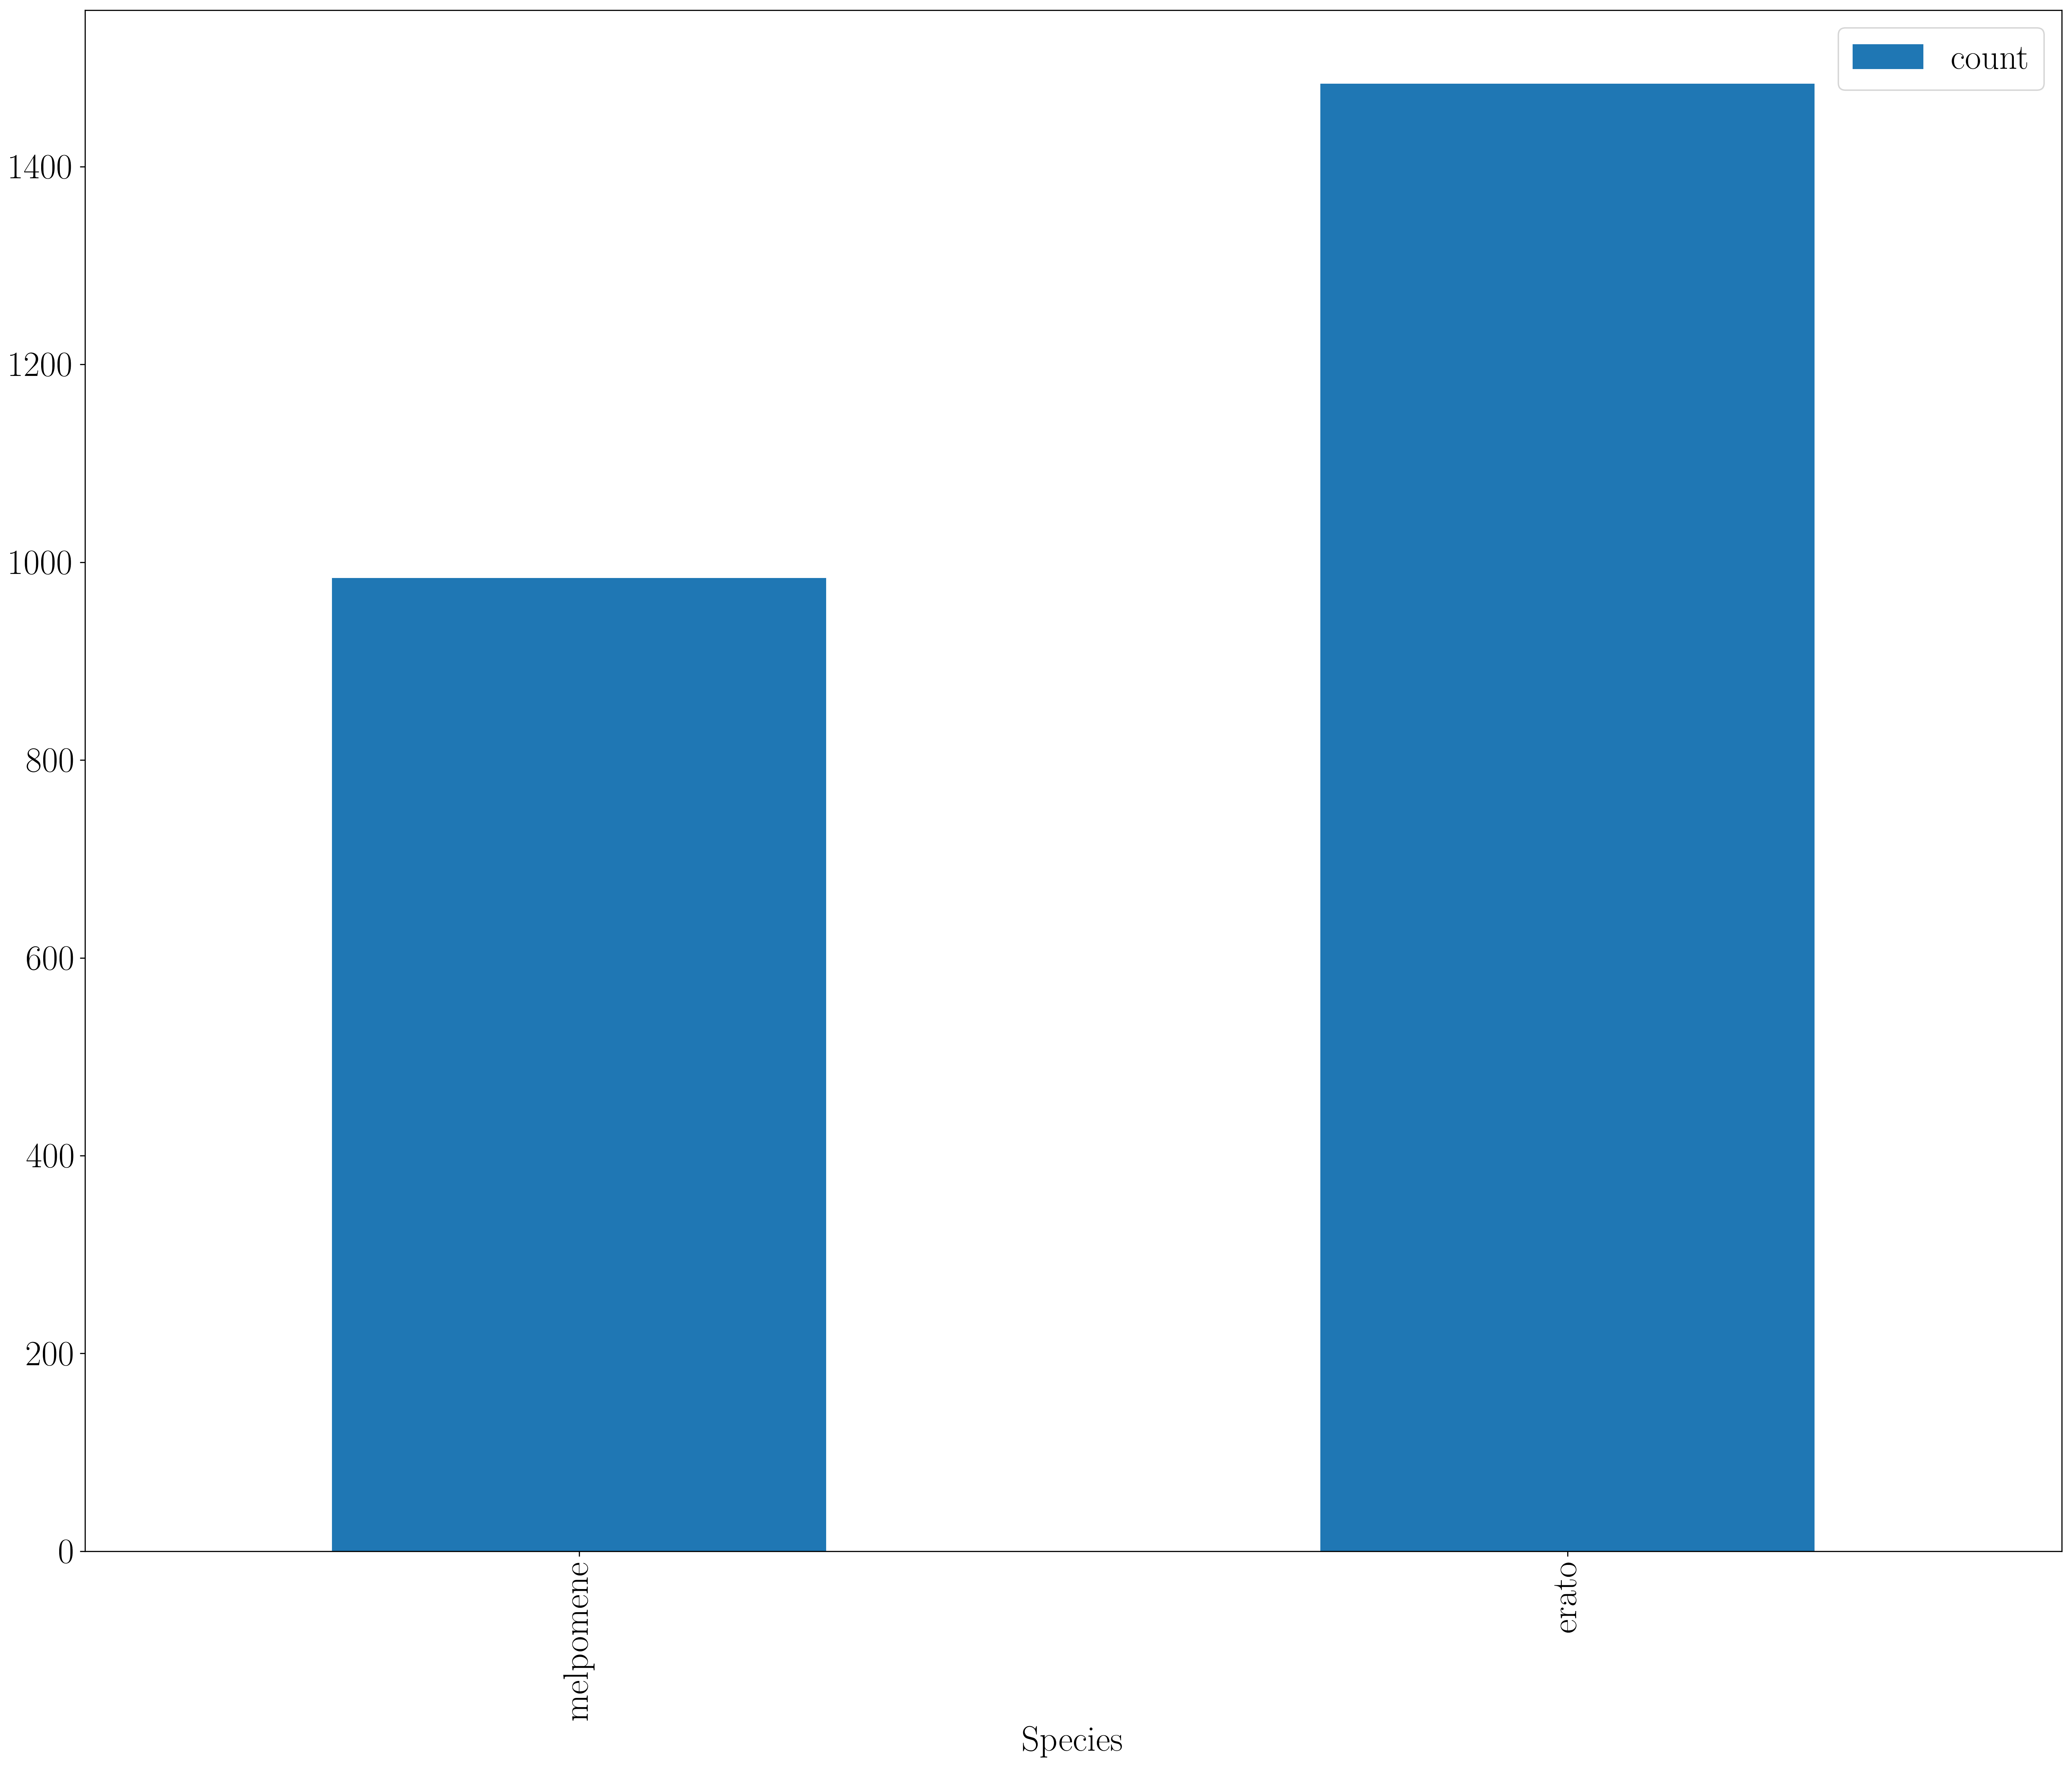

In [5]:
getStats(species_csv_scientificName_header, df, 'count_per_species')

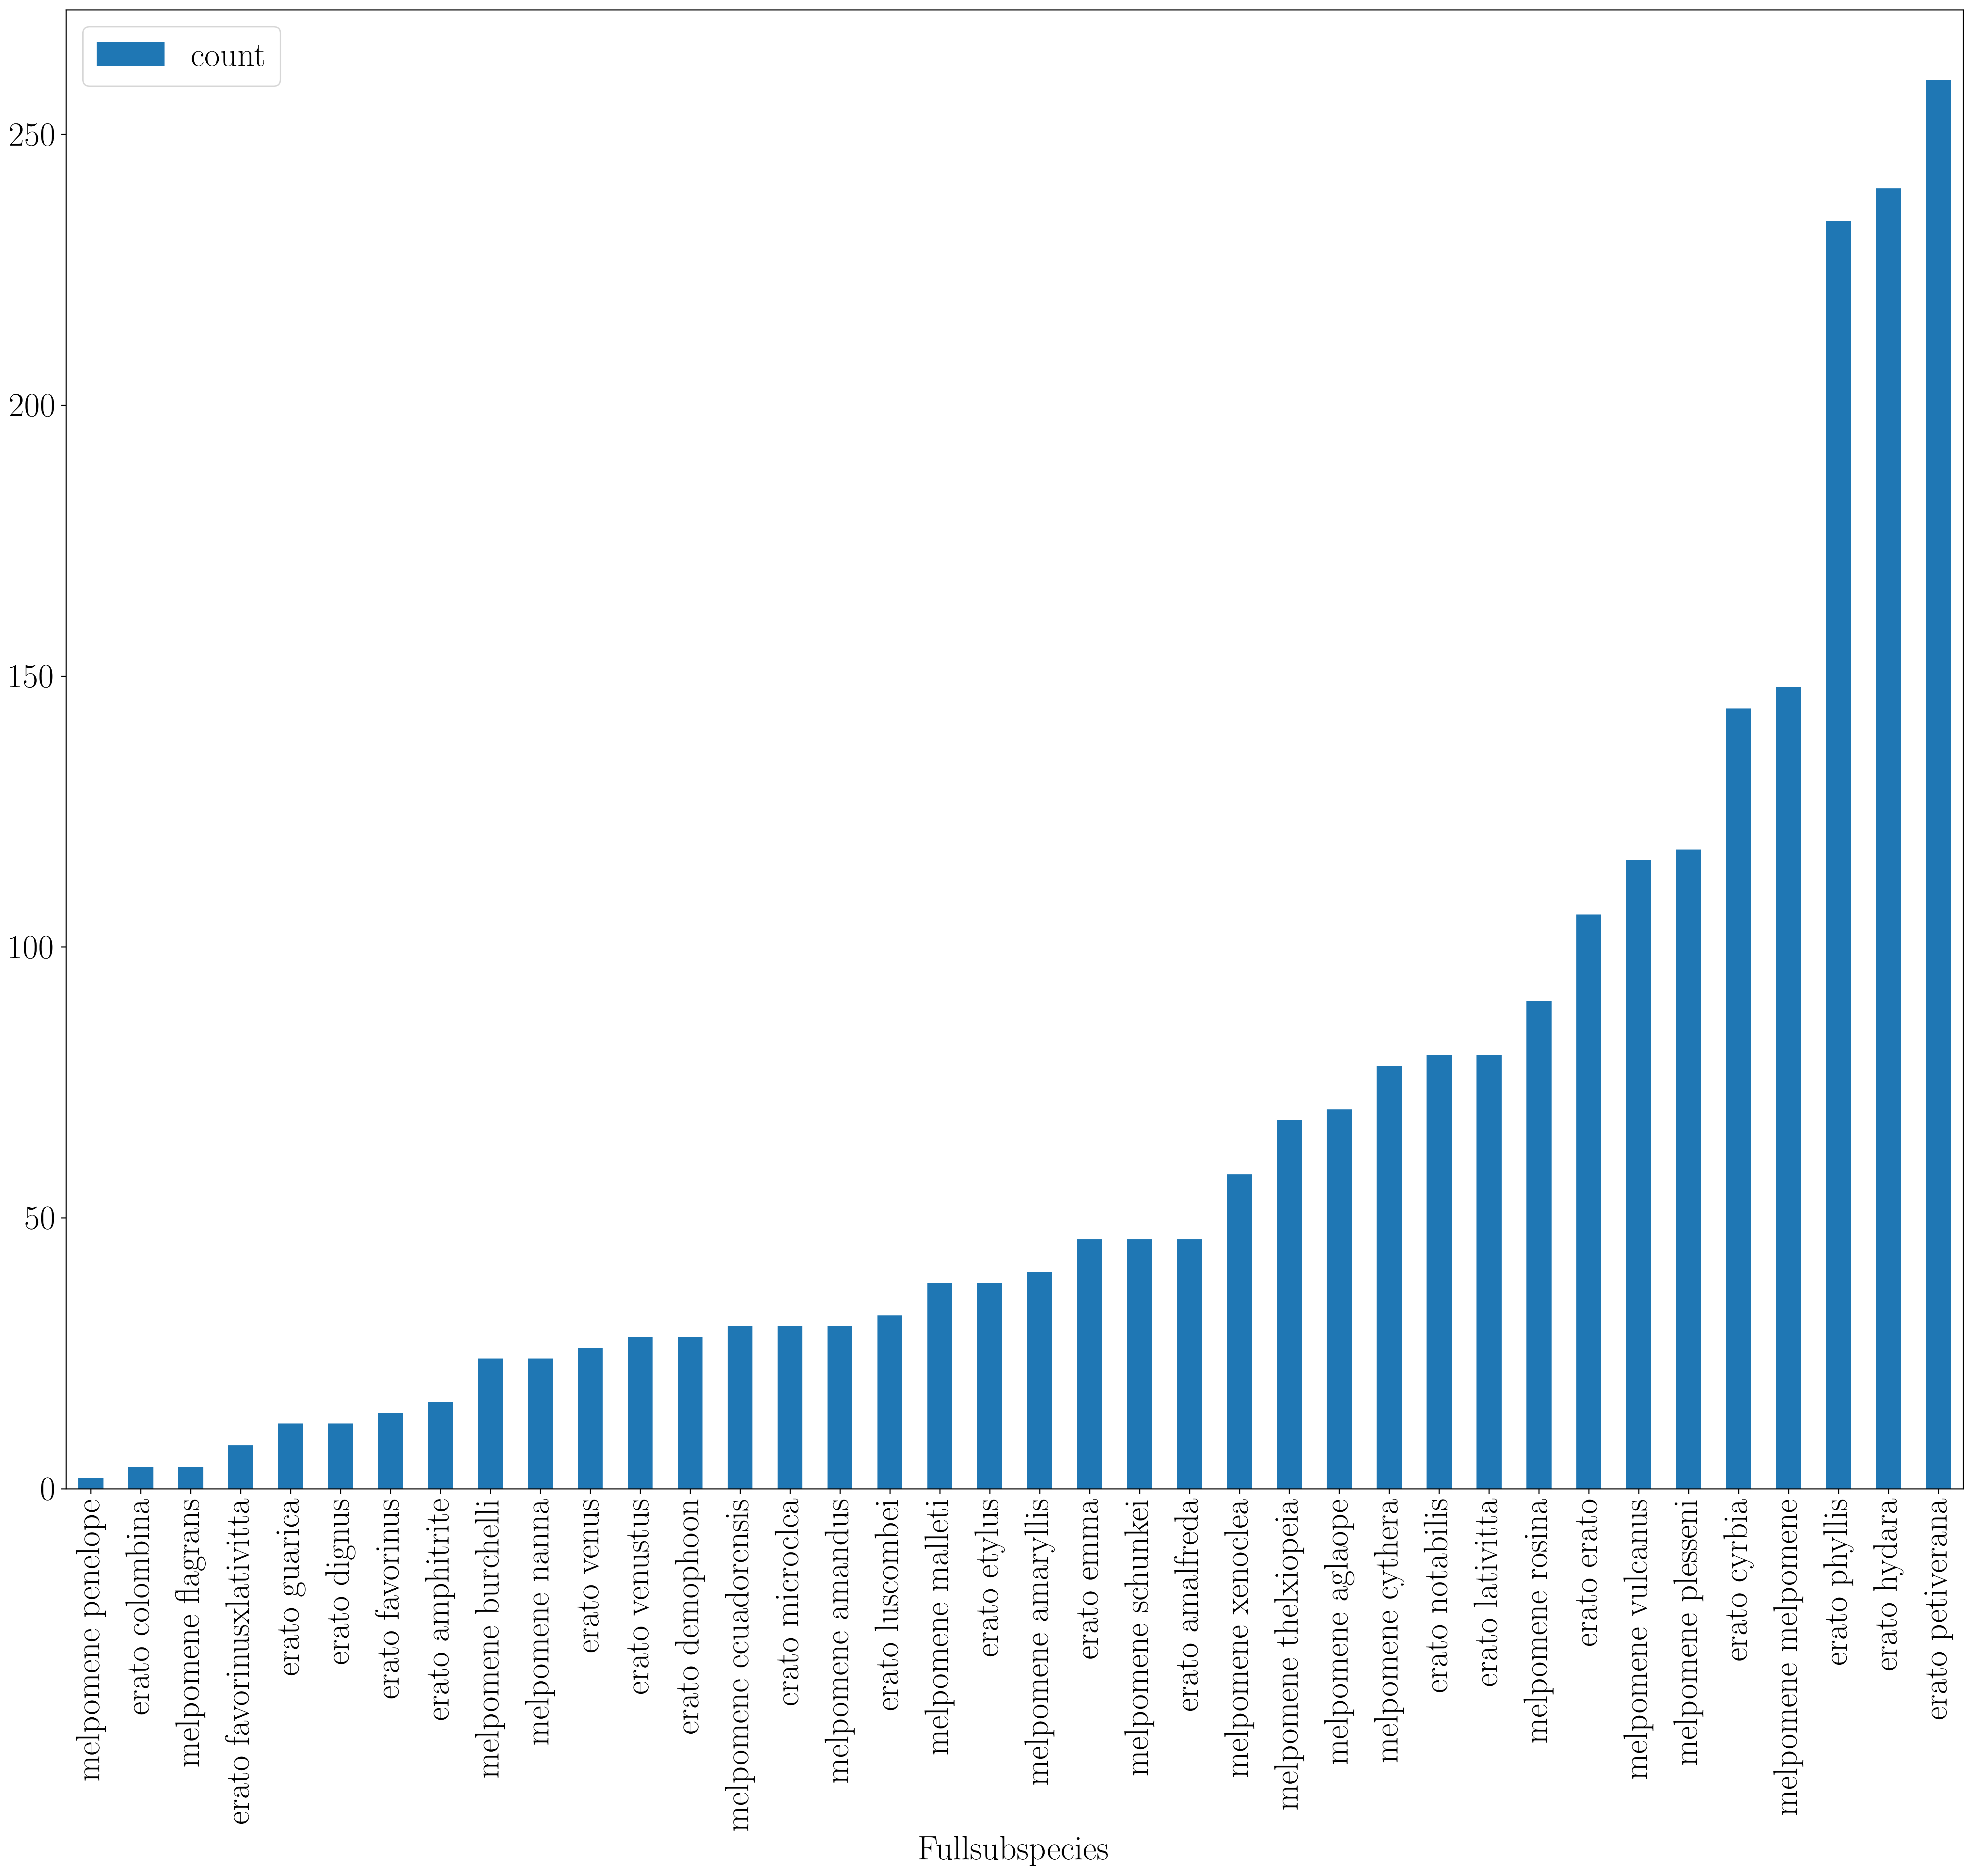

In [6]:
getStats(species_csv_fullsubspecies_header, df, 'count_per_subspecies')

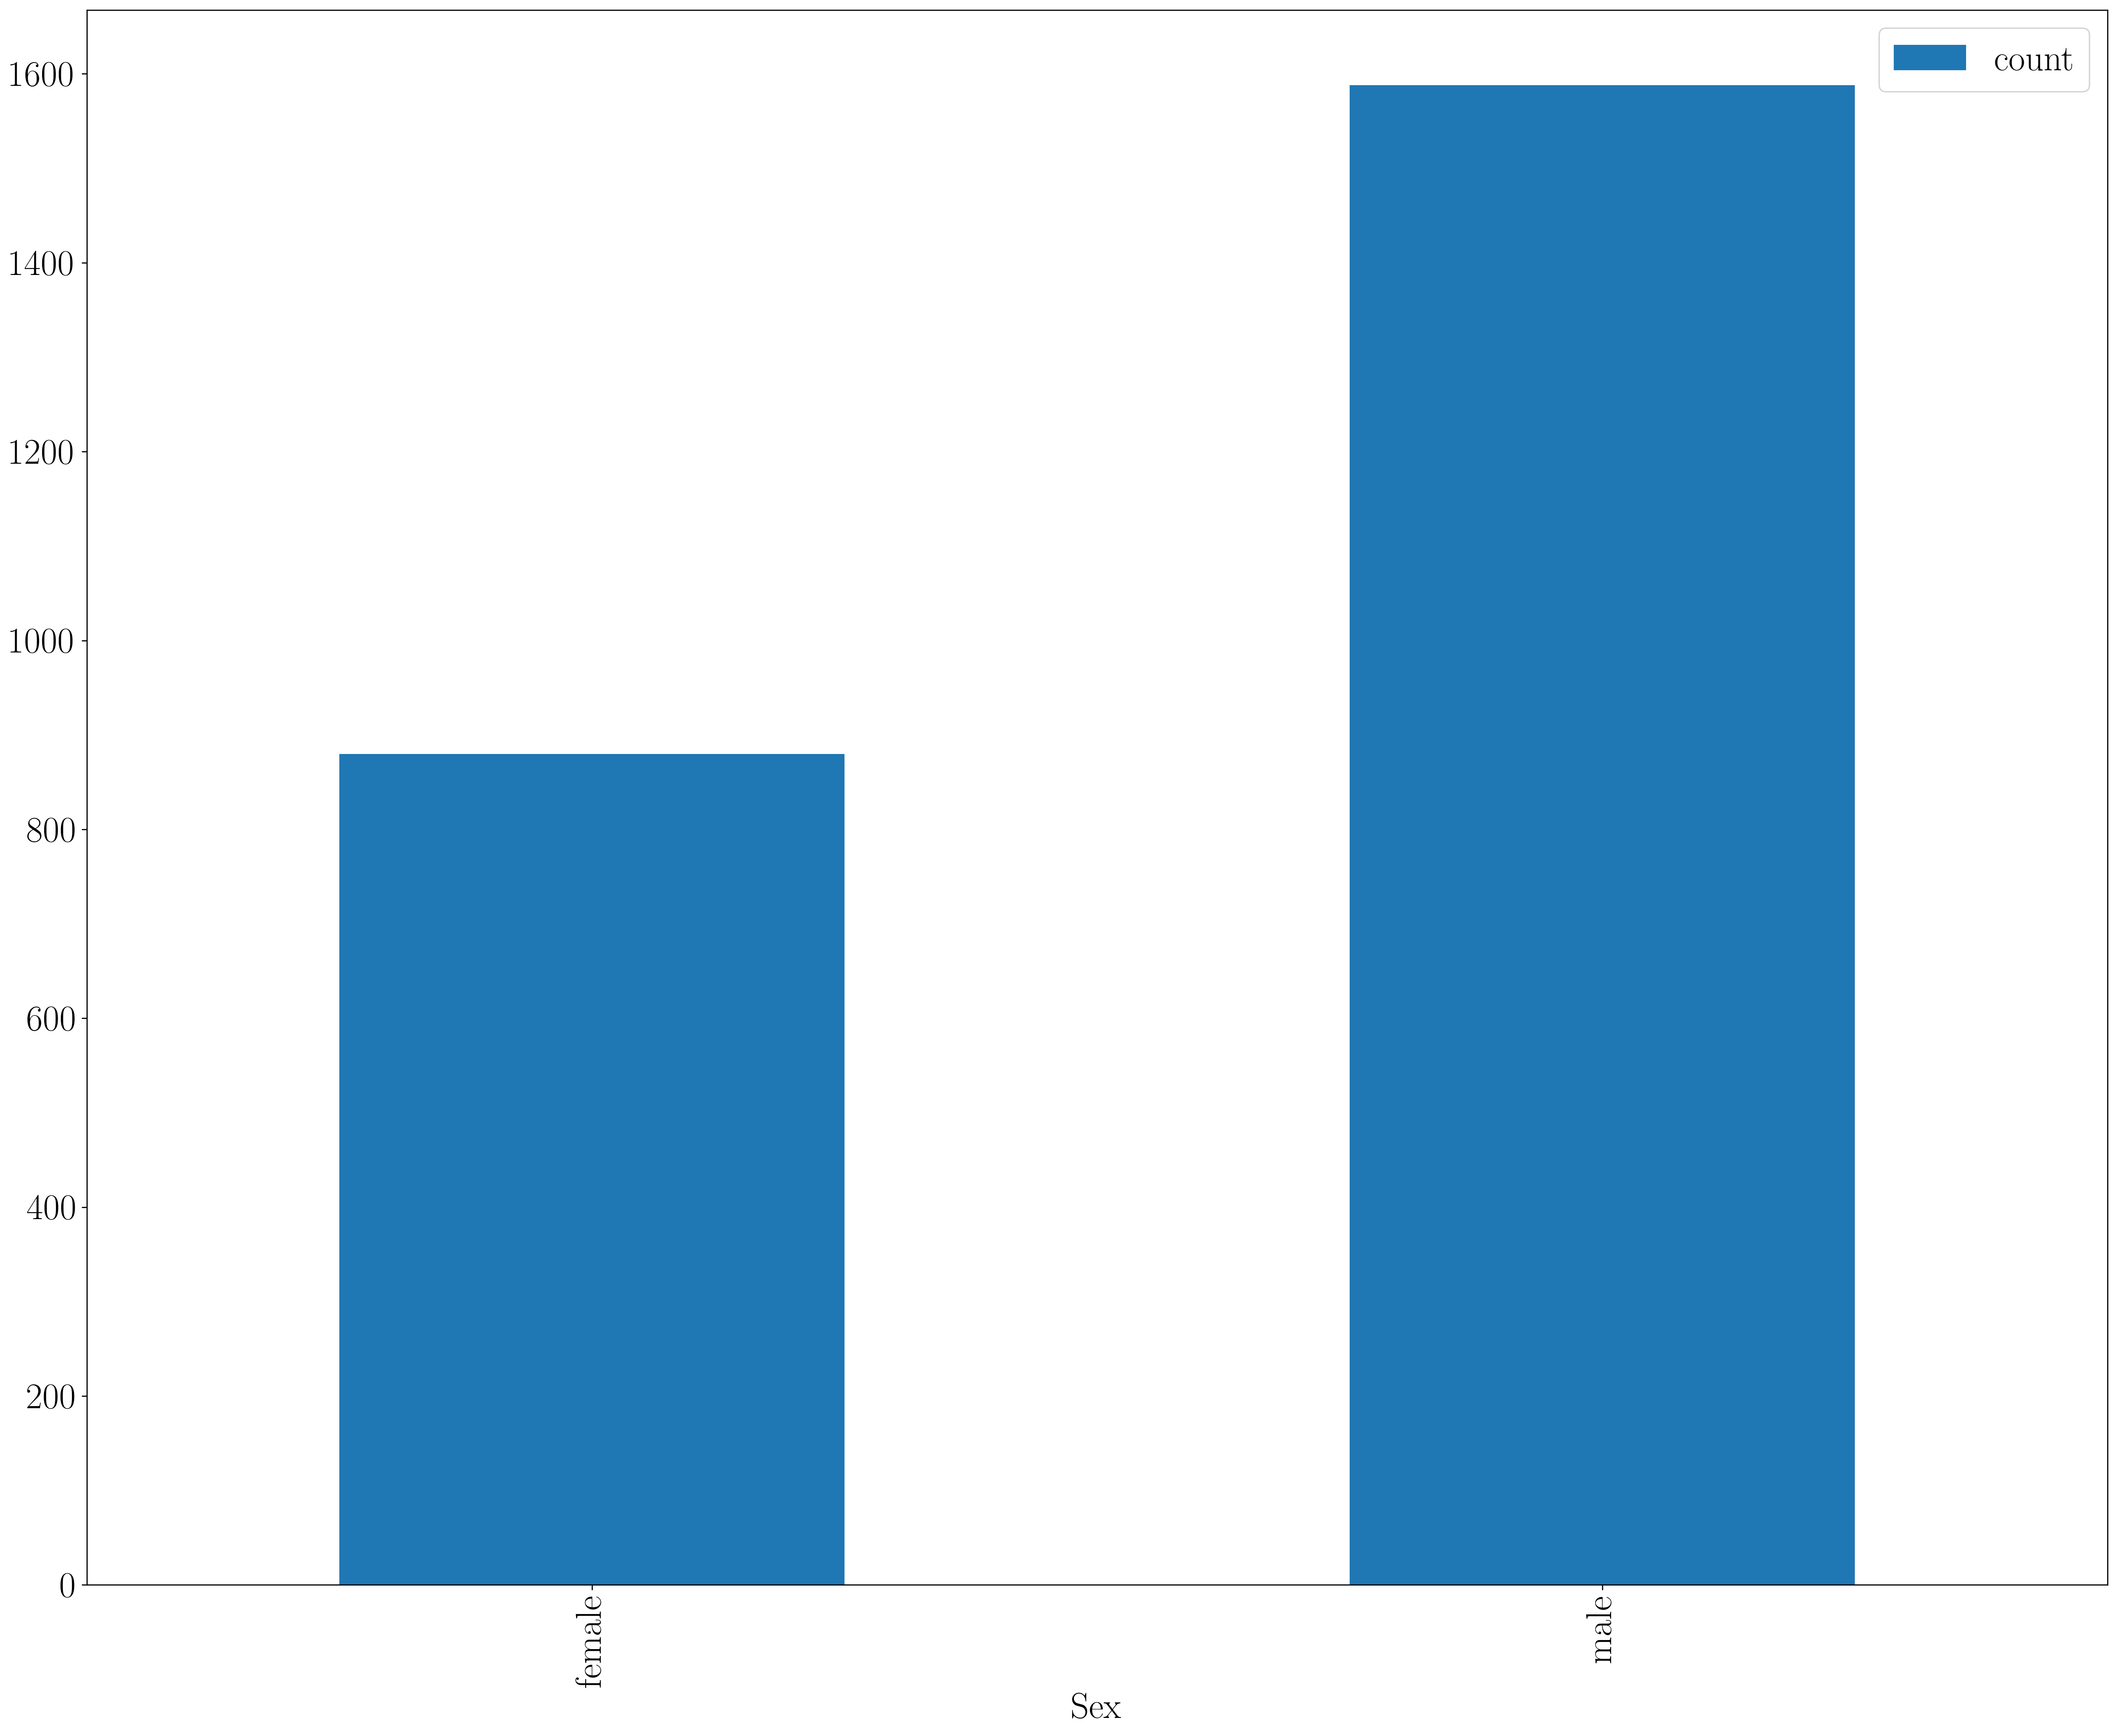

In [7]:
getStats(species_csv_sex_header, df, 'count_per_sex')

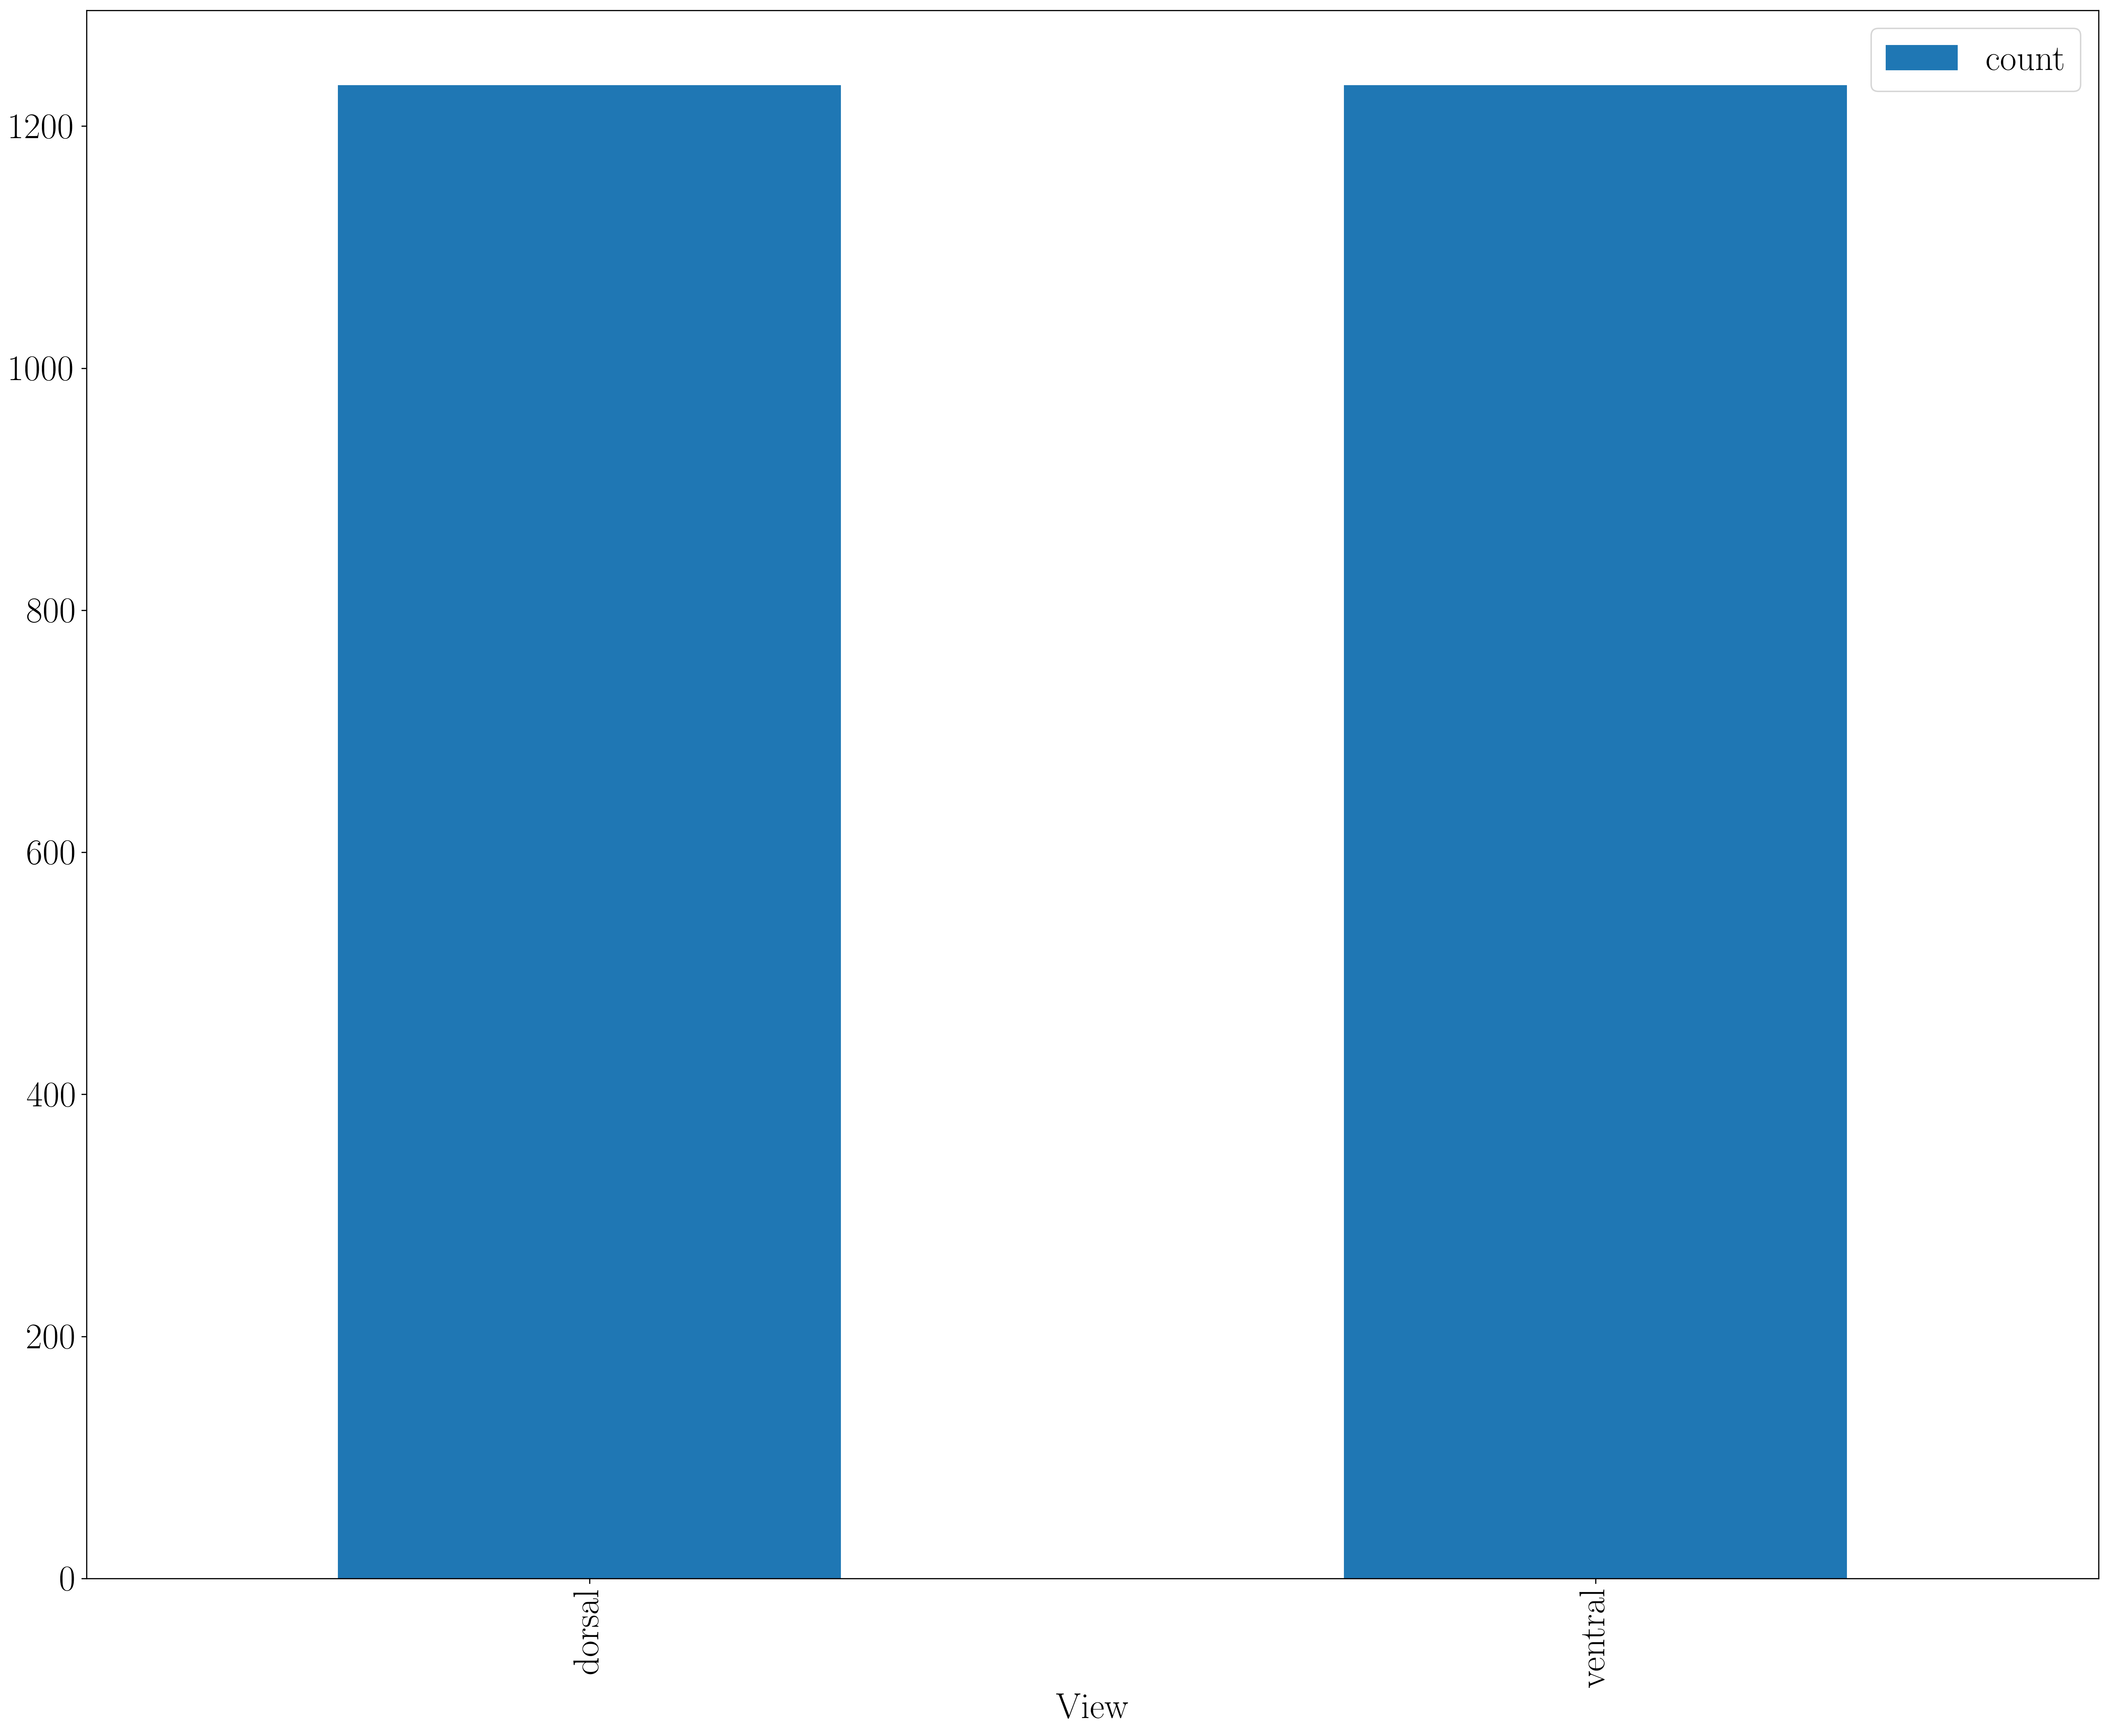

In [8]:
getStats(species_csv_view_header, df, 'count_per_view')

Get image size statistics

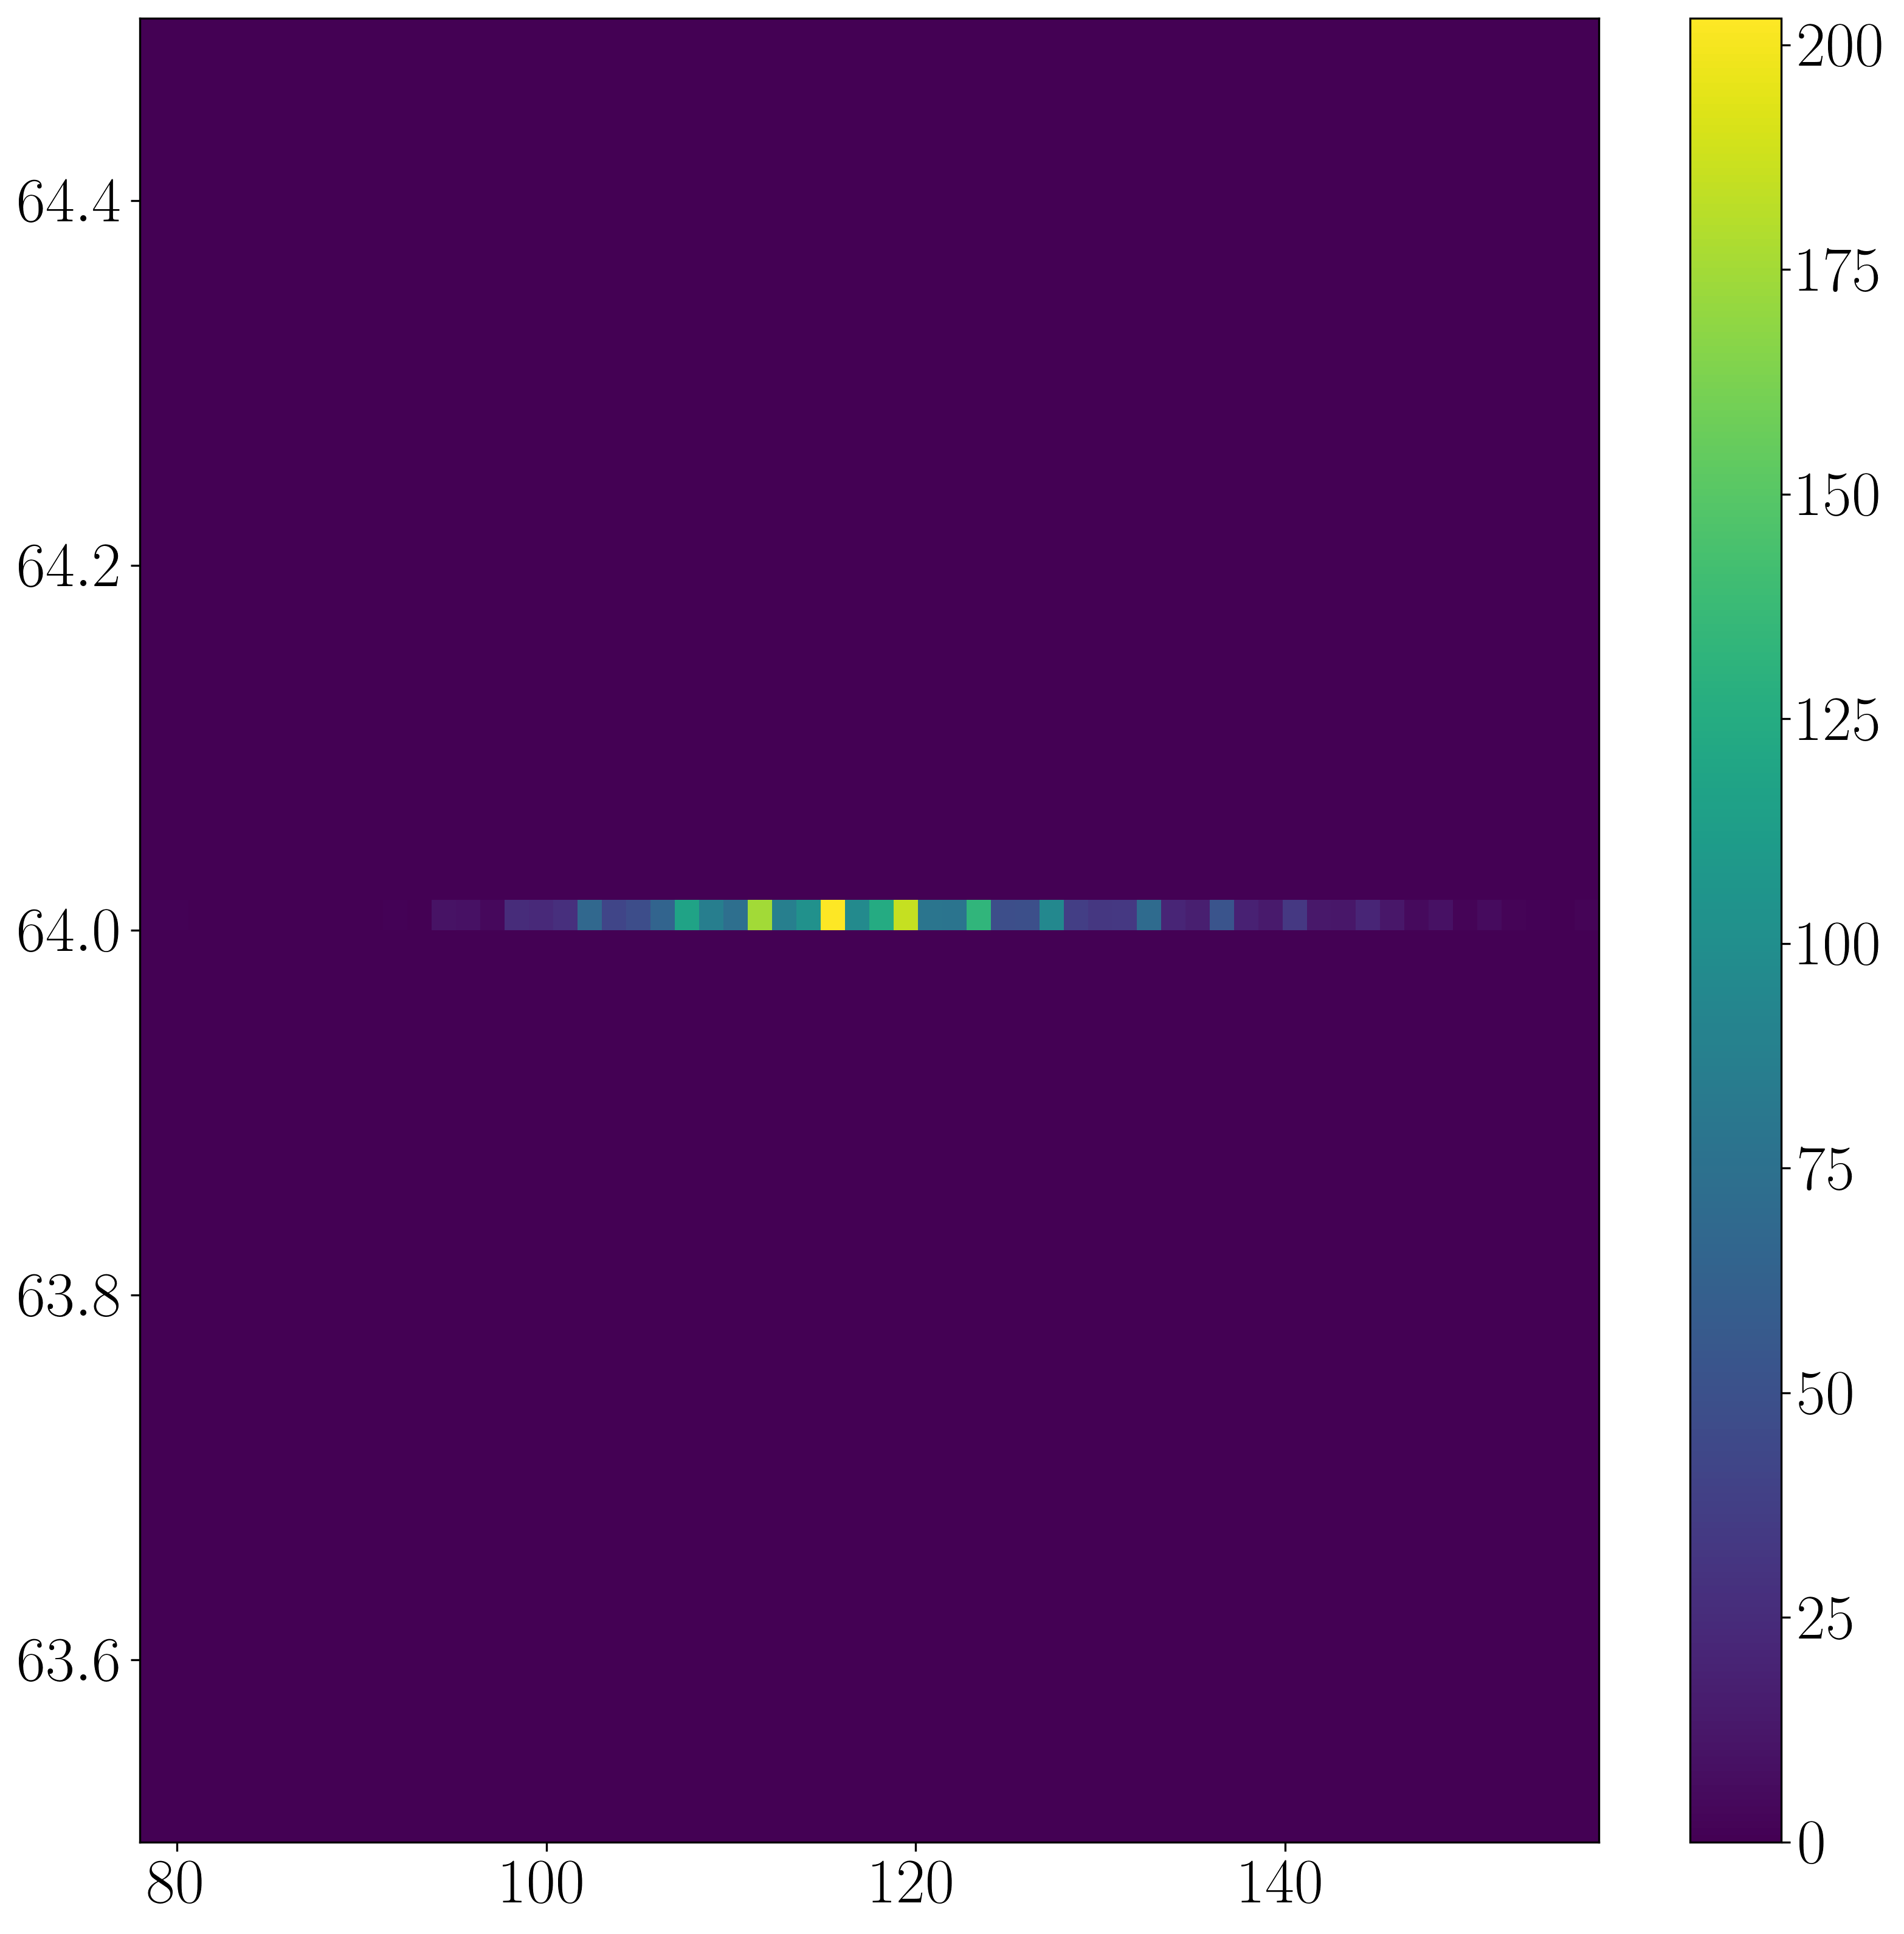

In [9]:
import PIL
from PIL import Image

img_count = len(df.index)

# Get image sizes
width=[]
height=[]
for indx, row in df.iterrows(): 
    image = PIL.Image.open(os.path.join(dataPath, image_subpath, indx))
    w, h = image.size
#     print(indx, w, h)
    width.append(w)
    height.append(h)

# plot histogram
plt.figure(figsize=(10, 10))
plt.hist2d(width, height, bins=60)
plt.subplots_adjust(bottom=0, top=1, left=0, right=1)
plt.colorbar()
plt.show()

In [10]:
print('height: ', min(height), ' ->', max(height))
print('width: ', min(width), ' ->', max(width))

height:  64  -> 64
width:  78  -> 157


Preprocess the dataframe and save it